In [1]:
from sklearn.datasets import load_digits
digits = load_digits()

In [2]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=0.3)

In [3]:
x_train = x_train.reshape(x_train.shape[0], 8, 8, 1)
x_test = x_test.reshape(x_test.shape[0], 8, 8, 1)

In [4]:
from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(8, kernel_size=(3,3), activation='relu', input_shape=(8,8,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [7]:
history = model.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,validation_data=(x_test,y_test))
score = model.evaluate(x_test,y_test)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Epoch 1/10
40/40 [==============================] - 1s 9ms/step - loss: 4.6011 - accuracy: 0.0939 - val_loss: 2.7706 - val_accuracy: 0.1093
Epoch 2/10
40/40 [==============================] - 0s 3ms/step - loss: 2.2821 - accuracy: 0.2307 - val_loss: 1.8595 - val_accuracy: 0.3444
Epoch 3/10
40/40 [==============================] - 0s 4ms/step - loss: 1.6014 - accuracy: 0.4471 - val_loss: 1.3996 - val_accuracy: 0.5556
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 1.1826 - accuracy: 0.6356 - val_loss: 1.0816 - val_accuracy: 0.6926
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.8802 - accuracy: 0.7462 - val_loss: 0.8472 - val_accuracy: 0.7741
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.6661 - accuracy: 0.8059 - val_loss: 0.6783 - val_accuracy: 0.8167
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5364 - accuracy: 0.8401 - val_loss: 0.5657 - val_accuracy: 0.8519
Epoch 8/10
40/40 [==

Epoch 1/10
40/40 [==============================] - 1s 8ms/step - loss: 3.0826 - accuracy: 0.1655 - val_loss: 2.1374 - val_accuracy: 0.2981
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 1.8573 - accuracy: 0.3612 - val_loss: 1.4258 - val_accuracy: 0.5259
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 1.2250 - accuracy: 0.6006 - val_loss: 0.9562 - val_accuracy: 0.6963
Epoch 4/10
40/40 [==============================] - 0s 4ms/step - loss: 0.7877 - accuracy: 0.7486 - val_loss: 0.6265 - val_accuracy: 0.8167
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.5150 - accuracy: 0.8608 - val_loss: 0.4790 - val_accuracy: 0.8741
Epoch 6/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3840 - accuracy: 0.9029 - val_loss: 0.3906 - val_accuracy: 0.8833
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3071 - accuracy: 0.9181 - val_loss: 0.3400 - val_accuracy: 0.8944
Epoch 8/10
40/40 [==

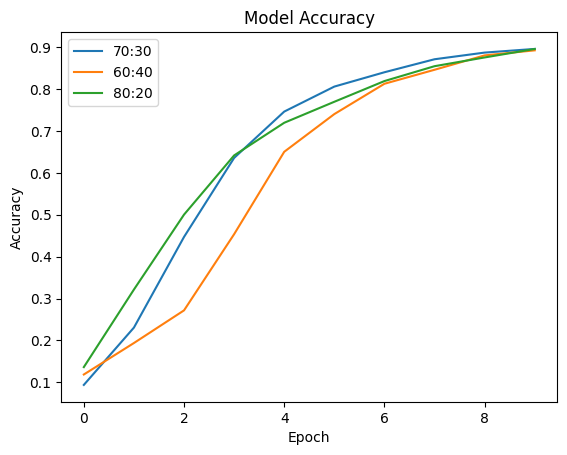

In [8]:
import matplotlib.pyplot as plt

# Splitting data into 60:40 ratio
x_train_60, x_test_60, y_train_60, y_test_60 = train_test_split(digits.data, digits.target, test_size=0.4)
x_train_60 = x_train_60.reshape(x_train_60.shape[0], 8, 8, 1)
x_test_60 = x_test_60.reshape(x_test_60.shape[0], 8, 8, 1)
y_train_60 = to_categorical(y_train_60)
y_test_60 = to_categorical(y_test_60)

# Splitting data into 80:20 ratio
x_train_80, x_test_80, y_train_80, y_test_80 = train_test_split(digits.data, digits.target, test_size=0.2)
x_train_80 = x_train_80.reshape(x_train_80.shape[0], 8, 8, 1)
x_test_80 = x_test_80.reshape(x_test_80.shape[0], 8, 8, 1)
y_train_80 = to_categorical(y_train_80)
y_test_80 = to_categorical(y_test_80)

# Creating models for each split ratio
model1 = Sequential()
model1.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,
                       validation_data=(x_test,y_test))
score1 = model1.evaluate(x_test,y_test)

model2 = Sequential()
model2.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_train_60,y_train_60,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_60,y_test_60))
score2 = model2.evaluate(x_test_60,y_test_60)

model3 = Sequential()
model3.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(x_train_80,y_train_80,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_80,y_test_80))
score3 = model3.evaluate(x_test_80,y_test_80)

# Plotting accuracy values for each split ratio
plt.plot(history.history['accuracy'], label='70:30')
plt.plot(history2.history['accuracy'], label='60:40')
plt.plot(history3.history['accuracy'], label='80:20')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

Epoch 1/20
40/40 [==============================] - 1s 9ms/step - loss: 4.1554 - accuracy: 0.1400 - val_loss: 2.9367 - val_accuracy: 0.1685
Epoch 2/20
40/40 [==============================] - 0s 4ms/step - loss: 2.4398 - accuracy: 0.2172 - val_loss: 1.9389 - val_accuracy: 0.3000
Epoch 3/20
40/40 [==============================] - 0s 3ms/step - loss: 1.5795 - accuracy: 0.4415 - val_loss: 1.2339 - val_accuracy: 0.5833
Epoch 4/20
40/40 [==============================] - 0s 4ms/step - loss: 1.0548 - accuracy: 0.6611 - val_loss: 0.8636 - val_accuracy: 0.7074
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.7575 - accuracy: 0.7693 - val_loss: 0.6578 - val_accuracy: 0.8130
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.5841 - accuracy: 0.8377 - val_loss: 0.5416 - val_accuracy: 0.8556
Epoch 7/20
40/40 [==============================] - 0s 4ms/step - loss: 0.4780 - accuracy: 0.8640 - val_loss: 0.4503 - val_accuracy: 0.8796
Epoch 8/20
40/40 [==

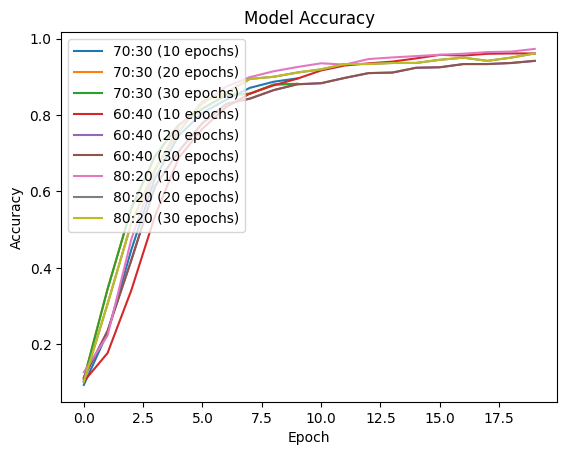

In [9]:
# Creating models for each split ratio
model1 = Sequential()
model1.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=20,verbose=1,
                       validation_data=(x_test,y_test))
score1 = model1.evaluate(x_test,y_test)

model2 = Sequential()
model2.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_train_60,y_train_60,batch_size=32,
                       epochs=20,
                       verbose=1,
                       validation_data=(x_test_60,y_test_60))
score2 = model2.evaluate(x_test_60,y_test_60)

model3 = Sequential()
model3.add(Conv2D(8,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(x_train_80,y_train_80,batch_size=32,
                       epochs=20,
                       verbose=1,
                       validation_data=(x_test_80,y_test_80))
score3 = model3.evaluate(x_test_80,y_test_80)

# Plotting accuracy values for each epoch value
plt.plot(history.history['accuracy'], label='70:30 (10 epochs)')
plt.plot(history.history['val_accuracy'], label='70:30 (20 epochs)')
plt.plot(history.history['val_accuracy'], label='70:30 (30 epochs)')
plt.plot(history2.history['accuracy'], label='60:40 (10 epochs)')
plt.plot(history2.history['val_accuracy'], label='60:40 (20 epochs)')
plt.plot(history2.history['val_accuracy'], label='60:40 (30 epochs)')
plt.plot(history3.history['accuracy'], label='80:20 (10 epochs)')
plt.plot(history3.history['val_accuracy'], label='80:20 (20 epochs)')
plt.plot(history3.history['val_accuracy'], label='80:20 (30 epochs)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

In [10]:
# Creating models for each split ratio
model1 = Sequential()
model1.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model1.add(MaxPooling2D(pool_size=(2,2)))
model1.add(Flatten())
model1.add(Dense(10,activation='softmax'))
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history1 = model1.fit(x_train,y_train,batch_size=32,epochs=10,verbose=1,
                       validation_data=(x_test,y_test))
score1 = model1.evaluate(x_test,y_test)

model2 = Sequential()
model2.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model2.add(MaxPooling2D(pool_size=(2,2)))
model2.add(Flatten())
model2.add(Dense(10,activation='softmax'))
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history2 = model2.fit(x_train_60,y_train_60,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_60,y_test_60))
score2 = model2.evaluate(x_test_60,y_test_60)

model3 = Sequential()
model3.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model3.add(MaxPooling2D(pool_size=(2,2)))
model3.add(Flatten())
model3.add(Dense(10,activation='softmax'))
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history3 = model3.fit(x_train_80,y_train_80,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_80,y_test_80))
score3 = model3.evaluate(x_test_80,y_test_80)

# Creating models for each split ratio
model4 = Sequential()
model4.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model4.add(MaxPooling2D(pool_size=(2,2)))
model4.add(Flatten())
model4.add(Dense(10,activation='softmax'))
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history4 = model4.fit(x_train,y_train,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test,y_test))
score4 = model4.evaluate(x_test,y_test)

model5 = Sequential()
model5.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model5.add(MaxPooling2D(pool_size=(2,2)))
model5.add(Flatten())
model5.add(Dense(10,activation='softmax'))
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history5 = model5.fit(x_train_60,y_train_60,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_60,y_test_60))
score5 = model5.evaluate(x_test_60,y_test_60)

model6 = Sequential()
model6.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(8,8,1)))
model6.add(MaxPooling2D(pool_size=(2,2)))
model6.add(Flatten())
model6.add(Dense(10,activation='softmax'))
model6.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
history6 = model6.fit(x_train_80,y_train_80,batch_size=32,
                       epochs=10,
                       verbose=1,
                       validation_data=(x_test_80,y_test_80))
score6 = model6.evaluate(x_test_80,y_test_80)

Epoch 1/10
40/40 [==============================] - 1s 8ms/step - loss: 3.9773 - accuracy: 0.1161 - val_loss: 2.4231 - val_accuracy: 0.2222
Epoch 2/10
40/40 [==============================] - 0s 4ms/step - loss: 1.7228 - accuracy: 0.4375 - val_loss: 1.3022 - val_accuracy: 0.5722
Epoch 3/10
40/40 [==============================] - 0s 3ms/step - loss: 0.9478 - accuracy: 0.7407 - val_loss: 0.8203 - val_accuracy: 0.7648
Epoch 4/10
40/40 [==============================] - 0s 3ms/step - loss: 0.5936 - accuracy: 0.8488 - val_loss: 0.5635 - val_accuracy: 0.8481
Epoch 5/10
40/40 [==============================] - 0s 4ms/step - loss: 0.3989 - accuracy: 0.8998 - val_loss: 0.4090 - val_accuracy: 0.8796
Epoch 6/10
40/40 [==============================] - 0s 3ms/step - loss: 0.2934 - accuracy: 0.9244 - val_loss: 0.3254 - val_accuracy: 0.8981
Epoch 7/10
40/40 [==============================] - 0s 4ms/step - loss: 0.2259 - accuracy: 0.9427 - val_loss: 0.2756 - val_accuracy: 0.9093
Epoch 8/10
40/40 [==

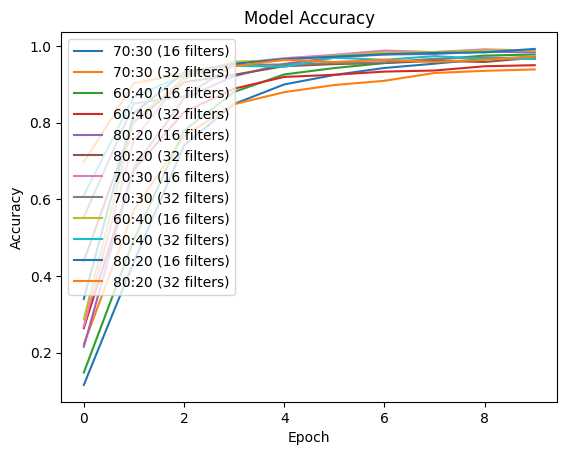

In [11]:
# Plotting accuracy values for each convolutional filter size
plt.plot(history1.history['accuracy'], label='70:30 (16 filters)')
plt.plot(history1.history['val_accuracy'], label='70:30 (32 filters)')
plt.plot(history2.history['accuracy'], label='60:40 (16 filters)')
plt.plot(history2.history['val_accuracy'], label='60:40 (32 filters)')
plt.plot(history3.history['accuracy'], label='80:20 (16 filters)')
plt.plot(history3.history['val_accuracy'], label='80:20 (32 filters)')
plt.plot(history4.history['accuracy'], label='70:30 (16 filters)')
plt.plot(history4.history['val_accuracy'], label='70:30 (32 filters)')
plt.plot(history5.history['accuracy'], label='60:40 (16 filters)')
plt.plot(history5.history['val_accuracy'], label='60:40 (32 filters)')
plt.plot(history6.history['accuracy'], label='80:20 (16 filters)')
plt.plot(history6.history['val_accuracy'], label='80:20 (32 filters)')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()